In [ ]:
!pip install pmdarima
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Final dataset.csv to Final dataset.csv


In [ ]:
df = pd.read_csv('Final dataset.csv')
data=df.dropna()
data.head()

,Date,temperature,humidity,dew_point,wind_speed,cloud_cover,load
0,01-01-2018,13.018688,0.883914,9.683352,0.699945,0.000438,1135.47
1,02-01-2018,12.192250,0.909453,9.709437,1.385180,0.000000,1146.47
2,03-01-2018,11.668945,0.906227,9.126797,1.852266,0.000875,1205.18
3,04-01-2018,12.453055,0.861000,8.896234,1.284063,0.004758,1176.20
4,05-01-2018,11.895352,0.879266,8.618805,2.000469,0.024117,1262.16


In [ ]:
date = data['Date']
load = data['load']

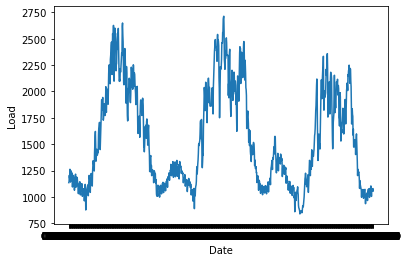

In [ ]:
plt.plot(date, load)
plt.xlabel('Date')
plt.ylabel('Load')
plt.show()

In [ ]:
rolling_mean = load.rolling(window=365).mean()
rolling_std = load.rolling(window=365).std()
print(rolling_mean,rolling_std)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1072    1448.685288
1073    1448.527068
1074    1448.298274
1075    1448.170301
1076    1447.837616
Name: load, Length: 1077, dtype: float64 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1072    402.076266
1073    402.216075
1074    402.412819
1075    402.523020
1076    402.797779
Name: load, Length: 1077, dtype: float64


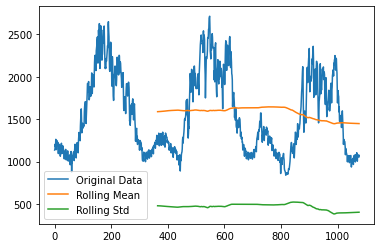

In [ ]:
plt.plot(data['load'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

In [ ]:
# Conduct the Augmented Dickey-Fuller test
result = adfuller(data['load'])

# Print the test statistic and p-value
print("Test Statistic: ", result[0])
print("p-value: ", result[1])
# Obtain the critical values
critical_values = pd.Series(result[4], index=['1%', '5%', '10%'])

# Print the critical values
print(critical_values)

Test Statistic:  -2.2336743697377317
p-value:  0.1942513419442617
1%    -3.436569
5%    -2.864286
10%   -2.568232
dtype: float64


In [ ]:
data.set_index('Date', inplace=True)
 

In [ ]:
ts = data.iloc[:, -1]

In [ ]:
train_data = ts[:'01-01-2018']

In [ ]:
test_data = ts['10-05-2020':]

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model = auto_arima(ts, start_p=1, start_q=1, max_p=5, max_q=5, m=12, seasonal=False,
                         d=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

/usr/local/lib/python3.9/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12750.023, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12766.859, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12763.558, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12762.158, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12764.860, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12721.760, Time=2.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12750.642, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12721.493, Time=2.00 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12740.057, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12719.900, Time=1.67 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12732.322, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=12704.681, Time=0.58 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=12705.293, Time=0.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=12586.101, Time=3.19 sec
 ARIMA(4,1,2)(0,0,0

In [ ]:
print(f"Optimal (p, d, q) = {arima_model.order}")

Optimal (p, d, q) = (5, 1, 3)


In [ ]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

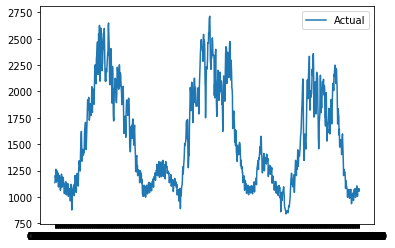

In [ ]:
arima = sm.tsa.ARIMA(data['load'], order=arima_model.order)
arima_fit = arima.fit()

# Generate predictions for the time series data
predictions = arima_fit.predict(start='01-01-2018', end='12-12-2020')

# Visualize the time series data and the predictions
plt.plot(data.index, data['load'], label='Actual')
plt.legend()
plt.show()

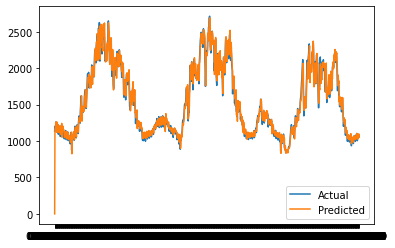

In [ ]:
plt.plot(data.index, data['load'], label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score

In [ ]:
mae = mean_absolute_error(data['load'], predictions)
mse = mean_squared_error(data['load'], predictions)
rmse = mean_squared_error(data['load'], predictions, squared=False)
mape = mean_absolute_percentage_error(data['load'], predictions)
r2_t = r2_score(data['load'],predictions )


# Print the evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print('R-squared:', r2_t)

MAE: 59.71
MSE: 7933.05
RMSE: 89.07
MAPE: 3.76%
R-squared: 0.9639010036283822


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Clean data 2.xlsx to Clean data 2.xlsx


In [ ]:
# Load the dataset
df = pd.read_excel('Clean data 2.xlsx')

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Split the dataset into training and testing sets
train_df = df[df['Date'] < '2020-12-12 ']
test_df = df[df['Date'] >= '2018-01-01']

# Define the features and target variable
features = ['Average of temperature', 'Average of cloud_cover', 'Average of dew_point', 'Average of wind_speed', 'Average of humidity', 'Average of apparent_temperature']
target = 'Average of load'

# Scale the features
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Split the features and target variable for training and testing sets
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Train the model
model = SVR(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the predictions and actual values
results_df = pd.DataFrame({'Date': test_df['Date'], 'Predicted': y_pred, 'Actual': y_test})



<ipython-input-3-8c38c98a3567>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])


In [ ]:
results_df

,Date,Predicted,Actual
0,2018-01-01,1333.628250,1135.467429
1,2018-01-02,1323.432042,1146.465108
2,2018-01-03,1319.669559,1205.179523
3,2018-01-04,1313.635395,1176.202886
4,2018-01-05,1311.527821,1262.161566
...,...,...,...
1072,2020-12-08,1295.613621,1057.539311
1073,2020-12-09,1293.918453,1065.345528
1074,2020-12-10,1293.731291,1061.649506
1075,2020-12-11,1293.154103,1079.251913


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")


MAE: 298.3427653123859
MSE: 139269.3133067287
R-squared: 0.36619983907673026
RMSE: 373.19
MAPE: 18.64%


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rfr = RandomForestRegressor(n_estimators=1000, max_depth=100, random_state=42)
model_rfr.fit(X_train, y_train)

# Make predictions
y_pred_rfr = model_rfr.predict(X_test)

# Print the predictions and actual values
results_df_rfr = pd.DataFrame({'Date': test_df['Date'], 'Predicted': y_pred_rfr, 'Actual': y_test})


In [ ]:
results_df_rfr


,Date,Predicted,Actual
0,2018-01-01,1147.067452,1135.467429
1,2018-01-02,1153.975437,1146.465108
2,2018-01-03,1194.310102,1205.179523
3,2018-01-04,1166.684620,1176.202886
4,2018-01-05,1252.364268,1262.161566
...,...,...,...
1072,2020-12-08,1053.692234,1057.539311
1073,2020-12-09,1059.616898,1065.345528
1074,2020-12-10,1060.331915,1061.649506
1075,2020-12-11,1070.692623,1079.251913


In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_rfr)
print('MAE:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_rfr)
print('MSE:', mse)
rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred_rfr)

# Calculate R-squared
r2_rfr = r2_score(y_test, y_pred_rfr)
print('R-squared:', r2_rfr)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")

MAE: 40.96332920370084
MSE: 3357.2479484534133
R-squared: 0.984721513738617
RMSE: 57.94
MAPE: 2.63%


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Clean data 2.xlsx to Clean data 2.xlsx


In [ ]:
data1 = pd.read_excel("Clean Data.xlsx")
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the historical data into a pandas DataFrame


# Split the data into training and testing sets
train_data = data1.iloc[:80, :]
test_data = data1.iloc[80:, :]

# Define the features and target variable
features = ['Average of temperature', 'Average of cloud_cover', 'Average of dew_point', 'Average of wind_speed', 'Average of humidity', 'Average of apparent_temperature']
target = 'Average of load'

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(train_data[features], train_data[target])

# Make predictions on the test data
prediction= model.predict(test_data[features])
predictions= pd.DataFrame(prediction)
print(predictions)
print(test_data)

               0
0    1051.411551
1    1052.724811
2    1069.299211
3    1088.667700
4    1105.288930
..           ...
992  1050.938019
993  1055.065132
994  1067.806600
995  1076.294761
996  1071.303343

[997 rows x 1 columns]
           Date  Average of temperature  Average of cloud_cover  \
80   2018-03-22               26.266680                0.257141   
81   2018-03-23               25.268250                0.063492   
82   2018-03-24               26.668414                0.000000   
83   2018-03-25               26.896625                0.000000   
84   2018-03-26               27.732250                0.000875   
...         ...                     ...                     ...   
1072 2020-12-08               20.723828                0.188672   
1073 2020-12-09               21.008859                0.080281   
1074 2020-12-10               21.494211                0.057422   
1075 2020-12-11               21.634648                0.054633   
1076 2020-12-12               19.88

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load the dataset
df = pd.read_excel('Clean data 2.xlsx')

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Split the dataset into training and testing sets
train_df = df[df['Date'] < '2020-12-12 ']
test_df = df[df['Date'] >= '2018-01-01']

# Define the features and target variable
features = ['Average of temperature', 'Average of cloud_cover', 'Average of dew_point', 'Average of wind_speed', 'Average of humidity', 'Average of apparent_temperature']
target = 'Average of load'

# Scale the features
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Split the features and target variable for training and testing sets
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Train the model
model = SVR(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the predictions and actual values
results_df = pd.DataFrame({'Date': test_df['Date'], 'Predicted': y_pred, 'Actual': y_test})
print(results_df)


           Date    Predicted       Actual
0    2018-01-01  1333.628250  1135.467429
1    2018-01-02  1323.432042  1146.465108
2    2018-01-03  1319.669559  1205.179523
3    2018-01-04  1313.635395  1176.202886
4    2018-01-05  1311.527821  1262.161566
...         ...          ...          ...
1072 2020-12-08  1295.613621  1057.539311
1073 2020-12-09  1293.918453  1065.345528
1074 2020-12-10  1293.731291  1061.649506
1075 2020-12-11  1293.154103  1079.251913
1076 2020-12-12  1325.587710  1055.653683

[1077 rows x 3 columns]


<ipython-input-12-9dcf50967ba5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.fit_transform(train_df[features])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
   
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
    plt.title('Confusion Matrix', fontsize = 15)
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

model_accuracy = pd.DataFrame(columns=['Model','MSE'])
models = {
          "Linear Regression" : LinearRegression(),
          "Ridge Regression" : Ridge(),
          'Lasso Regression' : Lasso(),
          'Decision Tree Regressor' : DecisionTreeRegressor(),
          'Random Forest Regressor' : RandomForestRegressor() }
 
for test, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    train_pred = clf.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    print("\n", test + ' scores')
    print("MSE on test set:", mse)
    print("MSE on train set:", train_mse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    print("MAPE: ",mape)
    


 Linear Regression scores
MSE on test set: 61626.09767779462
MSE on train set: 61667.52988950242
R^2: 0.7195460385502435
MAE: 201.461744263632
MAPE:  0.13997424196078853

 Ridge Regression scores
MSE on test set: 61654.55079870403
MSE on train set: 61694.72794547139
R^2: 0.7194165513560944
MAE: 201.57883552573244
MAPE:  0.1402063325258775

 Lasso Regression scores
MSE on test set: 61802.90685103685
MSE on train set: 61841.60688341148
R^2: 0.7187413983908795
MAE: 202.31795475673988
MAPE:  0.14117360144544594

 Decision Tree Regressor scores
MSE on test set: 26.108414991651806
MSE on train set: 0.0
R^2: 0.9998811833186345
MAE: 0.15569777342540989
MAPE:  0.00014748944268709257

 Random Forest Regressor scores
MSE on test set: 3523.0606184213893
MSE on train set: 3521.3948040707737
R^2: 0.9839669175220237
MAE: 41.29459962422334
MAPE:  0.026478992400151505
